In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [2]:
mode='rgb'
def read_picmode(figpath,mode='rgb'):#決定讀取黑白還彩色
    if (mode=='rgb'):
        pic=cv2.imread(figpath)
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    elif (mode=='gray'):
        pic=cv2.imread(figpath, cv2.IMREAD_GRAYSCALE)
    return pic
pic=read_picmode('picdir/chicken.jpg',mode)
print(pic.shape)
print(pic.shape[0]*pic.shape[1])

(708, 651, 3)
460908


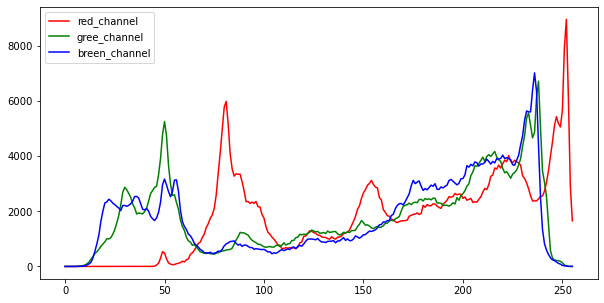

In [3]:
def cal_plot_histogram(pic,mode='rgb'):
    height=pic.shape[0]
    weight=pic.shape[1]
    image_histogram=np.zeros(256)
    rgb_histogram=np.zeros((3,256))
    plt.figure(figsize=(10,5))#繪出histogram
    if (mode=='rgb'):
        for i in range(height):
            for j in range(weight):
                value=pic[i][j]
                rgb_histogram[0][value[0]]=rgb_histogram[0][value[0]]+1 #r像素質個數
                rgb_histogram[1][value[1]]=rgb_histogram[1][value[1]]+1 #g
                rgb_histogram[2][value[2]]=rgb_histogram[2][value[2]]+1 #b
        plt.plot(rgb_histogram[0],c='r',label='red_channel')
        plt.plot(rgb_histogram[1],c='g',label='gree_channel')
        plt.plot(rgb_histogram[2],c='b',label='breen_channel')
        plt.legend()
        return rgb_histogram
    else:
        for i in range(height):
            for j in range(weight):
                value=pic[i][j]
                image_histogram[value]=image_histogram[value]+1 #計算每個亮度值得個數
        plt.bar(range(256),image_histogram,label='gray_level')
        plt.legend()
        return image_histogram
histogram=cal_plot_histogram(pic)
   

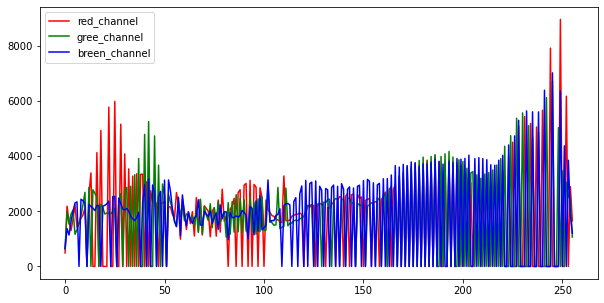

In [4]:
def histogram_equlization(histogram,mode):
    if (mode=='rgb'):
        image_pdf=histogram/(pic.size/3)
        image_cdf=np.zeros((3,256))
        convert_pic=np.zeros((pic.shape[0],pic.shape[1],3))
        for i in range(3):
            image_cdf[i]=np.cumsum(image_pdf[i])
        image_equ_value=np.around(image_cdf*255).astype('uint8')
        for i in range(3):
            convert_pic[:,:,i]=(image_equ_value[i][pic[:,:,i]])
        convert_pic=convert_pic.astype('uint8')
        
    else:
        image_pdf=histogram/pic.size #pic.size=height*weight pdf為每個亮度出線的機率
        image_cdf=np.cumsum(image_pdf)#累積機率用於normalization
        #print(image_cdf)
        image_equ_value=np.around(image_cdf*255).astype('uint8')#返回四捨五入的值 #代表原本的亮度應該對應到的亮度
        #print(image_equ_value)
        covert_pic = image_equ_value[pic] #在pic座標的亮度對應到equal_value後應該為多少亮度 輸出shape為pic的shape
        
        #print(covert_pic.shape)
    return convert_pic

        
convert_pic=histogram_equlization(histogram,mode)
newhis=cal_plot_histogram(convert_pic,mode)

        


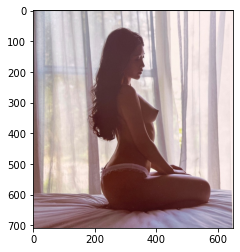

In [6]:
plt.imshow(pic)

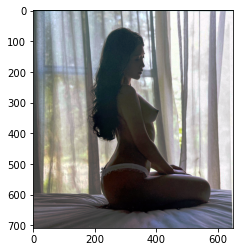

In [7]:
plt.imshow(convert_pic)